## Анализ юнит-экономики проекта

### Описание проекта

#### Цель и объект анализа

1. **Объект анализа**: Развлекательное приложение Procrastinate Pro+,

2. **Описание проблемы**:
Приложение приносит убытки, несмотря на высокий объем инвестиций в рекламу,

3. **Задача**:
Определить причины, сформировать рекомендации по оптимизации,

4. **Данные**: Анализ производится на основе информации о пользователях, привлечённых с 1 мая по 27 октября 2019 года на основе предоставленных данных:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

#### Описание этапов анализа данных

Анализ данных будет происходить в несколько этапов:

1. Предобработка данных с целью подготовки для анализа,
2. Подготовка функций для расчета, визуализации и анализа показателей LTV, ROI, Retention, CAC, окупаемости инвестиций в рекламу,
3. Анализ в полученных данных (в т.ч. с разбивкой по странам, устройствам, рекламным источникам),
4. Выводы и рекомендации.

### Загрузка данных и подготовка их к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`,
- заказы: `/datasets/orders_info_short.csv`,
- расходы: `/datasets/costs_info_short.csv`.

Изучим данные и выполним предобработку

#### Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

Игнорирование сообщений об ошибках

In [2]:
import warnings
warnings.simplefilter("ignore")

#### Загрузка данных

In [3]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('/Users/bchain/Documents/Yandex_Practicum/projects/business_indicators_project/visits_info_short.csv')
    orders = pd.read_csv('/Users/bchain/Documents/Yandex_Practicum/projects/business_indicators_project/orders_info_short.csv')
    costs = pd.read_csv('/Users/bchain/Documents/Yandex_Practicum/projects/business_indicators_project/costs_info_short.csv')

#### Проверка вывода данных

In [4]:
display('DataSet visits:', visits)
display('='*80)
display('DataSet orders:', orders)
display('='*80)
display('DataSet costs:', costs)

'DataSet visits:'

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


'================================================================================'

'DataSet orders:'

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


'================================================================================'

'DataSet costs:'

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


#### Предобработка данных. Названия столбцов

Переведем названия столбцов в нижний регистр, затем откорректируем названия, содержащие пробелы

In [5]:
# Переводим в нижний регистр
visits.columns = map(str.lower, visits)
orders.columns = map(str.lower, orders)
costs.columns = map(str.lower, costs)

# Корректируем названия с пробелами
visits = visits.rename(columns={'user id':'user_id', 
                                'session start':'session_start',
                               'session end':'session_end'})
orders = orders.rename(columns={'user id':'user_id',
                               'event dt':'event_dt'})


display('DataSet visits:', visits)
display('='*80)
display('DataSet orders:', orders)
display('='*80)
display('DataSet costs:', costs)

'DataSet visits:'

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


'================================================================================'

'DataSet orders:'

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


'================================================================================'

'DataSet costs:'

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


#### Предобработка данных. Проверка на дубликаты

Проверим все датасеты на наличие дубликатов строк в данных

In [6]:
display('DataSet visits:', visits[visits.duplicated(keep=False)])
display('DataSet orders:',orders[orders.duplicated(keep=False)])
display('DataSet costs:',costs[costs.duplicated(keep=False)])

'DataSet visits:'

,user_id,region,device,channel,session_start,session_end


'DataSet orders:'

,user_id,event_dt,revenue


'DataSet costs:'

,dt,channel,costs


#### Предобработка данных. Вывод информации о дадасетах

In [7]:
display('DataSet visits:')
visits.info()
display('='*80)

display('DataSet orders:')
orders.info()
display('='*80)

display('DataSet costs:')
costs.info()

'DataSet visits:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


'================================================================================'

'DataSet orders:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


'================================================================================'

'DataSet costs:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В датасетах `visits`, `orders`, `costs` пропуски отсутствуют.
Следующие данные в столбцах имеют тип `object`, необходимо перевести в формат даты и времени:
- датасет `visits`, столбцы `session_start` и `session_end`
- датасет `orders`, столбец `event_dt`
- датасет `costs`, cтолбец `dt`

In [8]:
# Перевод в дату и время
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

# Вывод информации о датасетах
display('DataSet visits:')
visits.info()
display('='*80)

display('DataSet orders:')
orders.info()
display('='*80)

display('DataSet costs:')
costs.info()

'DataSet visits:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


'================================================================================'

'DataSet orders:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


'================================================================================'

'DataSet costs:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


#### Предобработка данных. Проверка на неявные дубли

In [9]:
display('DataSet visits:')
display(visits['region'].unique())
display(visits['device'].unique())
display(visits['channel'].unique())

display('DataSet costs:')
display(costs['channel'].unique())

'DataSet visits:'

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

'DataSet costs:'

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Значения в столбцах уникальные, неявные дубли отсутствуют

#### Предобработка данных. Проверка на пропуски

Для проверки пропусков в каждом столбце датасетов, создадим список, напишем функцию проверки и зададим цикл для вывода

In [10]:
# Зададим список с датасетами
datasets_names = [visits, orders, costs]

# Присвоим названия датасетам
visits.name = 'DataSet visits'
orders.name = 'DataSet orders'
costs.name = 'DataSet costs'

# Напишем функцию проверки на пропуски
def isna_view (value):
    return  (
                (value.isna().mean()*100)
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns = {0:'percent_space'})
                .style.background_gradient('coolwarm').format("{:.1f}")
            )
    isna_view (value)

# Задаем цикл проверки на пропуски
for value in datasets_names:
    display(value.name)
    display (isna_view (value))
    

'DataSet visits'

,percent_space
user_id,0.0
region,0.0
device,0.0
channel,0.0
session_start,0.0
session_end,0.0


'DataSet orders'

,percent_space
user_id,0.0
event_dt,0.0
revenue,0.0


'DataSet costs'

,percent_space
dt,0.0
channel,0.0
costs,0.0


Пропуски в датасетах отсутствуют

#### Предобработка данных. Проверка временных интервалов

Проверим временные интервалы: были ли случаи, когда окончание сессии было раньше начала. Для этого выполним расчет в отдельной переменной с разницей session_end "минус" session_start

In [11]:
visits_check = visits # Присвоим новой переменной значения visits

# delta будет содержать разницу между началом и окончанием сессии
visits_check['delta'] = visits_check['session_end'] - visits_check['session_start'] 
visits_check

,user_id,region,device,channel,session_start,session_end,delta
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01,0 days 00:09:00
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35,0 days 00:01:04
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08,0 days 01:22:43
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25,0 days 00:24:26
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40,0 days 00:24:05
...,...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29,0 days 01:11:17
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36,0 days 00:24:44
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31,0 days 00:00:43
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55,0 days 00:00:21


Напишем функцию проверки на наличие отрицательных значений (перевел в текстовый формат, чтобы не

In [12]:
try:
    check_data = []
    for value in visits_check['session_start']:
        if value > visits_check['session_end']:
            check_data.append(value)
        else:
            print('Сессии заполнены корректно')  
except:
    print('Пропуск кода')

Пропуск кода


#### Предобработка данных. Проверка на аномалии

Проверим данные на наличие отрицательных значений. Начнем с дохода. Посмотрим, какие минимальные и максимальные значения принимают данные столбца 'revenue' и построим диаграмму размаха

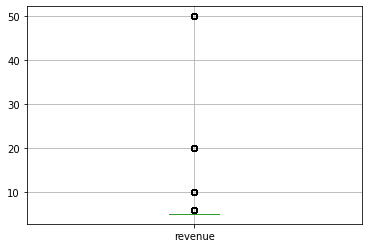

In [13]:
orders.boxplot('revenue');

In [14]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

На диаграмме размаха есть выбросы по доходу, но это нормально, в любом бизнесе есть некоторое количество покупок на большие чек. Исследуем данные по расходам

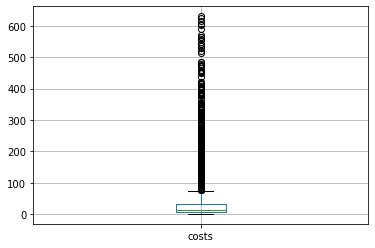

In [15]:
costs.boxplot('costs');

In [16]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

По расходам максимальные значения значительно отличаются от средних. Посмотрим, в какие даты происходили подобные выбросы и построим динамику изменения рекламных расходов за весь период

In [17]:
date_costs = costs.query('costs > 300') # Получаем расходы более 300 у.е.
date_costs['month'] = pd.to_datetime(date_costs['dt']).dt.month # Вычисляем номер месяца
date_costs['month'].unique() # Выводим месяцы, в которые происходил аномальный рост расходов

array([ 6,  7,  8,  9, 10])

Во все месяцы происходили расходы более 300 у.е. в день

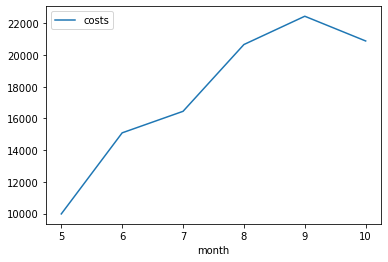

In [18]:
date_costs_all = costs
date_costs_all['month'] = pd.to_datetime(date_costs_all['dt']).dt.month # Вычисляем номер месяца
date_costs_all_pivot = date_costs_all.pivot_table(index='month', values='costs', aggfunc='sum').reset_index()
date_costs_all_pivot.plot('month');

Из месяца в месяц наблюдаем увеличение рекламного бюджета, поэтому максимальное значение трат в день можно не принимать за аномалию

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция `get_profiles()` — для создания профилей пользователей

In [19]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    
    costs['dt'] = pd.to_datetime(costs['dt']).dt.date
    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция `get_retention()` — для подсчёта Retention Rate

In [20]:
# функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция `get_conversion()` — для подсчёта конверсии

In [21]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция `get_ltv()` — для подсчёта LTV

In [22]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция `filter_data()` — для сглаживания фрейма

In [23]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция `plot_retention()` — для визуализации удержания

In [24]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Функция `plot_conversion()` — для визуализации конверсии

In [25]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция `plot_ltv_roi()` — для визуализации LTV и ROI

In [26]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируем выводы.

#### Момент и горизонт анализа данных

In [27]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

#### Профили пользователей

Подготовим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей. 

Выведем первые 5 строк с полученными профилями пользователей

In [28]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5))

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


##### Минимальная и максимальная даты привлечения пользователей

In [29]:
display('Минимальная дата привлечения пользователей:', profiles['dt'].min())
display('Минимальная дата привлечения пользователей:', profiles['dt'].max())

'Минимальная дата привлечения пользователей:'

datetime.date(2019, 5, 1)

'Минимальная дата привлечения пользователей:'

datetime.date(2019, 10, 27)

Данные в предоставленных заказчиком таблицах совпадают по значениям с заявленными в ТЗ минимальными и максимальными временными интервалами, значит можно говорить о предоставлении полной информации

##### Страны

В этом и следующих блоках будем анализировать страны, устройства и рекламные источники. Для этого напишем функцию, которая будет решать задачи анализа

In [30]:
profiles_raw = []
profiles_pay = []

# Пишем функцию по анализу доли платящих пользователей от всех пользователей и от платящих пользователей
def users_payers (profiles_raw, profiles_pay):
    # Подготавливаем профили для вывода данных (Все пользователи)
    profiles_raw = profiles.pivot_table(index=value, values='user_id', aggfunc='count')
    profiles_all = profiles_raw.rename(columns={'user_id':'total_users'}) 
    
    # Подготавливаем профили для вывода данных (Платящие пользователи)
    profiles_pay = profiles.query('payer == True').pivot_table(index=value, values='user_id', aggfunc='count')
    profiles_payers = profiles_pay.rename(columns={'user_id':'pay_users'}) 
    
    
    # Соединяем в один датасет
    profiles_connect = profiles_all.merge(profiles_payers, on=value, how='left')
    
    # Вычисляем долю платящих юзеров от общего числа пользователей
    profiles_connect['pay_users_share_from_total_users'] = (profiles_connect['pay_users']  
                                                            / profiles_connect['total_users'] * 100)
    
    # Вычисляем долю платящих юзеров среди всех платящих пользователей
    profiles_connect['pay_users_share_from_paying_users'] = (profiles_connect['pay_users'] 
                                                             / profiles_connect['pay_users'].sum() * 100)
    
    # Сортируем по доле платящих юзеров от общего числа пользователей и округляем до одной запятой
    profiles_connect = round(profiles_connect.sort_values('pay_users_share_from_total_users', ascending=False),1)
    profiles_connect = profiles_connect.reset_index()
    
    # Строим диаграмму для визуализации
    fig, ax = plt.subplots(figsize=(15, 5)) # Размер графика
    ax.set_title('Доля платящих пользователей от общего числа платящих пользователей приложения, (%)')
    plt.xticks(rotation=45)  # Угол наклона подписей
    ax = sns.barplot(data=profiles_connect, x=value, y='pay_users_share_from_paying_users');

    # Добавляем подписи к графику
    for i in ax.containers:
        ax.bar_label(i,)
    return profiles_connect

Вызовем функцию для решения следующих задач:
- Из каких стран пользователи приходят в приложение,
- На какую страну приходится больше всего платящих пользователей,
- Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны,
- Построим диаграмму, отражающую долю платящих пользователей от общего кол-ва платящих пользователей приложения по странам.

,region,total_users,pay_users,pay_users_share_from_total_users,pay_users_share_from_paying_users
0,United States,100002,6902,6.9,77.7
1,Germany,14981,616,4.1,6.9
2,UK,17575,700,4.0,7.9
3,France,17450,663,3.8,7.5


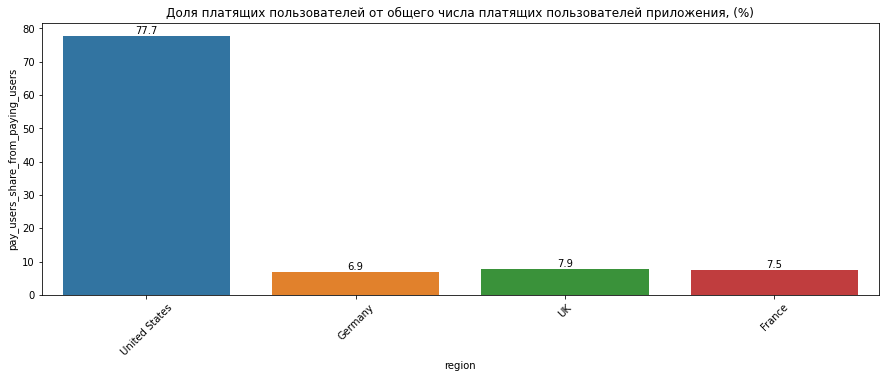

In [31]:
value = 'region'
users_payers (profiles_raw, profiles_pay)

**Выводы:**
- Пользователи продукта заходят в приложение из четырех стран: United States, UK, France и Germany,
- Больше всего пользователей (100002 клиентов) приходится на United States,
- Наибольшая доля платящих пользователей приходится на United States и составляет 6,9%,
- Среди платящих пользователей в приложении от общего кол-ва платящих юзеров, пользователи United States составляют более 77%.

##### Устройства

Вызовем функцию для решения следующих задач:
- Какими устройствами пользуются клиенты,
- Какие устройства предпочитают платящие пользователи,
- Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства,
- Построим диаграмму, отражающую долю платящих пользователей от общего кол-ва платящих пользователей приложения по девайсам.

,device,total_users,pay_users,pay_users_share_from_total_users,pay_users_share_from_paying_users
0,Mac,30042,1912,6.4,21.5
1,iPhone,54479,3382,6.2,38.1
2,Android,35032,2050,5.9,23.1
3,PC,30455,1537,5.0,17.3


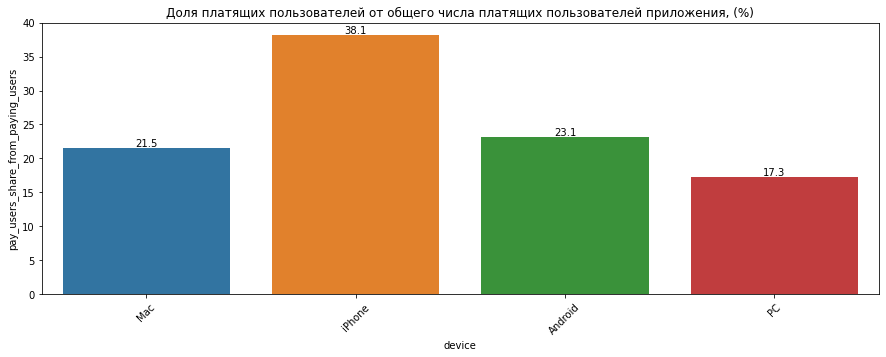

In [32]:
value = 'device'
users_payers (profiles_raw, profiles_pay)

**Выводы**
- Клиенты приложения (в том числе и платящие) пользуются устройствами 'Mac', 'iPhone', 'PC', 'Android',
- Больше всего клиентов заходят в приложение через iPhone (54479 пользователей),
- Наибольшая доля платящих пользователей принадлежит устройству 'Mac' (6,4%) в общем кол-ве юзеров по девайсам,
- Среди устройств платящих пользователей от общего числа устройств платящих пользователей, первое место занимает 'iPhone' (38%).

##### Рекламные источники

Вызовем функцию для решения следующих задач:
- Какие источники используются для привлечения пользователей в приложение,
- Определим каналы, из которых пришло больше всего платящих пользователей,
- Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения,
- Построим диаграмму, отражающую долю платящих пользователей от общего кол-ва платящих пользователей приложения по источникам.

,channel,total_users,pay_users,pay_users_share_from_total_users,pay_users_share_from_paying_users
0,FaceBoom,29144,3557,12.2,40.1
1,AdNonSense,3880,440,11.3,5.0
2,lambdaMediaAds,2149,225,10.5,2.5
3,TipTop,19561,1878,9.6,21.1
4,RocketSuperAds,4448,352,7.9,4.0
5,WahooNetBanner,8553,453,5.3,5.1
6,YRabbit,4312,165,3.8,1.9
7,MediaTornado,4364,156,3.6,1.8
8,LeapBob,8553,262,3.1,3.0
9,OppleCreativeMedia,8605,233,2.7,2.6


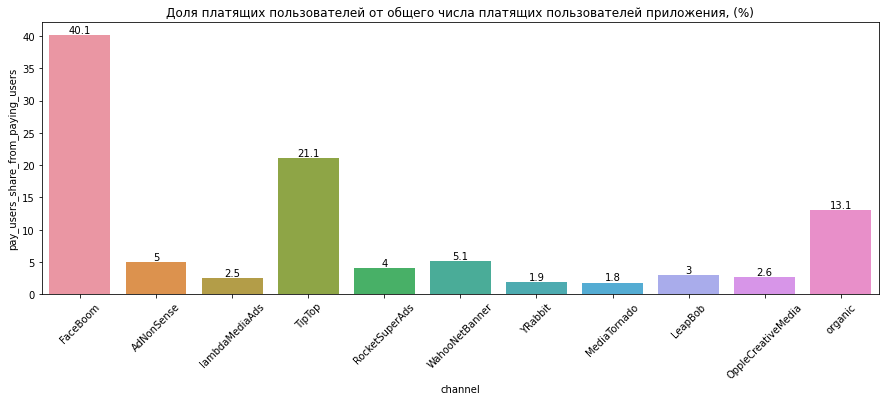

In [33]:
value = 'channel'
users_payers (profiles_raw, profiles_pay)

**Выводы**
- Пользователи приходят в приложение из 10 платных источников (органику исключили из рассмотрения),
- Наибольшая доля платящих юзеров принадлежит источнику 'FaceBoom',
- 'FaceBoom' также имеет максимальную долю среди всех платящих пользователей в разрезе по источникам.

**Общий вывод**
- Пользователи продукта заходят в приложение из четырех стран: United States, UK, France и Germany,
- Основным рынком является United States: больше всего пользователей (100002 клиентов) приходится на United States, на которую приходится самая высокая  доля платящих пользователей (6,9%),
- Клиенты приложения (в том числе и платящие) пользуются устройствами 'Mac', 'iPhone', 'PC', 'Android',
- Больше всего клиентов заходят в приложение через iPhone (54479 пользователей), но наибольшая доля платящих пользователей принадлежит устройству 'Mac' (6,4%) в общем кол-ве юзеров по девайсам,
- Среди устройств платящих пользователей от общего числа устройств платящих пользователей, первое место занимает 'iPhone' (38%).
- Пользователи приходят в приложение из 10 платных источников (органику исключили из рассмотрения),
- Наибольшая доля платящих юзеров принадлежит источнику 'FaceBoom',
- 'FaceBoom' также имеет максимальную долю среди всех платящих пользователей в разрезе по источникам.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

Перед проведением оценки рекламных показателей, очистим профили от органического трафика, поскольку анализ будем проводить по платным источникам

In [34]:
profiles = profiles.query('channel != "organic"')
profiles['channel'].unique()

array(['FaceBoom', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

#### Общая сумма расходов на маркетинг

In [35]:
'Сумма расходов на маркетинг:', round(costs['costs'].sum())

('Сумма расходов на маркетинг:', 105497)

#### Средний CAC по проекту 
<a id="cell2"></a>

Разделим общую сумму расходов на общую сумму уникальных пользователей по 'user_id' и рассчитаем средний CAC по проекту

In [36]:
costs['costs'].sum() / visits['user_id'].nunique()

0.703277825182657

Средний CAC по проекту составляет 0,70 у.е.

#### Расходы по источникам

In [37]:
costs_spread = costs.pivot_table(index='channel', values='costs', aggfunc='sum').sort_values('costs', ascending=False).reset_index()
costs_spread

,channel,costs
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


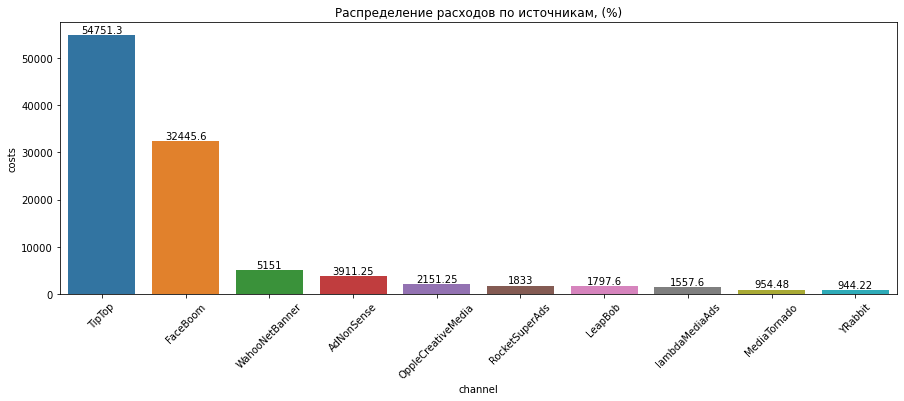

In [38]:
# Строим диаграмму для визуализации
fig, ax = plt.subplots(figsize=(15, 5)) # Размер графика
ax.set_title('Распределение расходов по источникам, (%)')
plt.xticks(rotation=45)  # Угол наклона подписей
ax = sns.barplot(data=costs_spread, x='channel', y='costs');

    # Добавляем подписи к графику
for i in ax.containers:
    ax.bar_label(i,)

Проанализируем в процентном соотношении доли расходов источников в общем рекламном бюджете

In [39]:
costs_spread['share'] = costs_spread['costs'] / costs_spread['costs'].sum() * 100
costs_spread

,channel,costs,share
0,TipTop,54751.30,51.898295
1,FaceBoom,32445.60,30.754910
2,WahooNetBanner,5151.00,4.882589
3,AdNonSense,3911.25,3.707441
4,OppleCreativeMedia,2151.25,2.039152
5,RocketSuperAds,1833.00,1.737485
6,LeapBob,1797.60,1.703930
7,lambdaMediaAds,1557.60,1.476436
8,MediaTornado,954.48,0.904744
9,YRabbit,944.22,0.895018


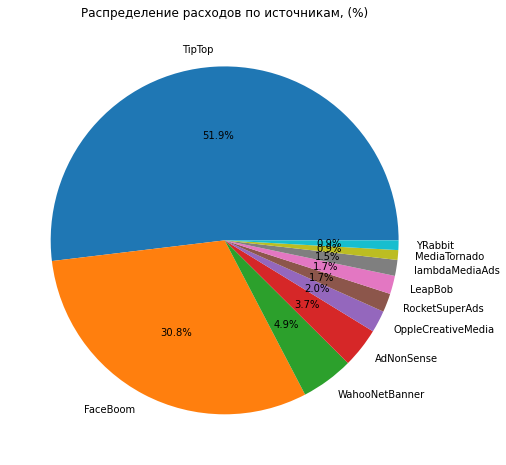

In [40]:
# Строим круговую диаграмму для визуализации
fig, ax = plt.subplots(figsize=(8, 8)) # Размер графика
labels = costs_spread['channel']
ax.set_title('Распределение расходов по источникам, (%)')
ax.pie(data=costs_spread, x='share', labels=labels,autopct='%1.1f%%');
plt.show()

**Выводы**
- Из общего объема средств, более 51% приходится на источник 'TipTop', 38% - на 'FaceBoom'
- В ТОП-3 источника по объему расходов входят 'TipTop', 'FaceBoom', 'WahooNetBanner'.

#### Динамика изменения расходов во времени

Подготовим номера месяцев и недель для анализа динамики расходов во времени

In [41]:
costs_flow = costs # Копируем в новую переменную данные из датасета costs
costs_flow['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week # Получаем неделю
costs_flow['month'] = pd.to_datetime(costs['dt']).dt.month # Получаем месяц
costs_flow

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,10,43
1796,2019-10-24,lambdaMediaAds,6.4,10,43
1797,2019-10-25,lambdaMediaAds,8.8,10,43
1798,2019-10-26,lambdaMediaAds,8.8,10,43


Выведем динамику расходов по неделям и месяцам на графиках

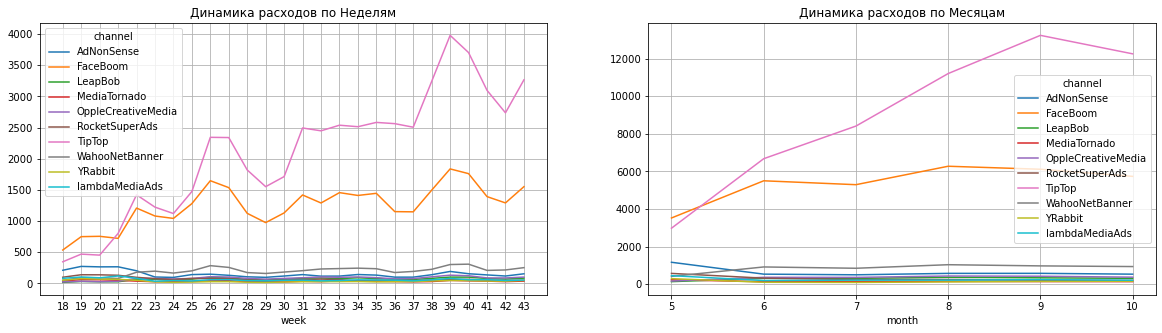

In [42]:
plt.figure(figsize=(20, 5)) # Задаем размер графиков

# Задаем недельные расходы
report_week = (
    costs_flow
    .reset_index()
    .pivot_table(index='channel', columns='week', values='costs', aggfunc='sum')
)

# Строим динамику расходов по Неделям
report_week.T.plot(
    grid=True, xticks=list(report_week.columns.values), ax=plt.subplot(1, 2, 1)
)
plt.title('Динамика расходов по Неделям')

# Задаем расходы по месяцам
report_month = (
    costs_flow
    .reset_index()
    .pivot_table(index='channel', columns='month', values='costs', aggfunc='sum')
)

# Строим изменение расходов по Месяцам
report_month.T.plot(
    grid=True, xticks=list(report_month.columns.values), ax=plt.subplot(1, 2, 2)
)
plt.title('Динамика расходов по Месяцам')
plt.show()

**Выводы**
- Начиная с 21-й недели началось увеличение расходов в источниках 'TipTop' и 'FaceBoom'. Пик расходов зафиксирован на 39-й неделе в Сентябре (9-й месяц). 
- В остальных источниках увеличения рекламного бюджета не наблюдается

#### Расчет среднего CAC по источникам

Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [43]:
mean_cac = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean').sort_values('acquisition_cost', ascending=False).reset_index()
mean_cac

,channel,acquisition_cost
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


Посмотрим, как менялась средняя CAC по неделям и месяцам. Для этого получим номера месяцев и недель и построим графики

In [44]:
mean_cac_dynamic = profiles
mean_cac_dynamic['week'] = pd.to_datetime(mean_cac_dynamic['dt']).dt.isocalendar().week # Получаем неделю
mean_cac_dynamic['month'] = pd.to_datetime(mean_cac_dynamic['dt']).dt.month # Получаем месяц
mean_cac_dynamic

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,week
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172,19
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237,28
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235,34
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769,40
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,6,True,1.008000,26
...,...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,5,False,1.900000,21
150001,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,8,False,1.117838,33
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,9,False,3.500000,39
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,7,False,2.600000,30


Построим графики

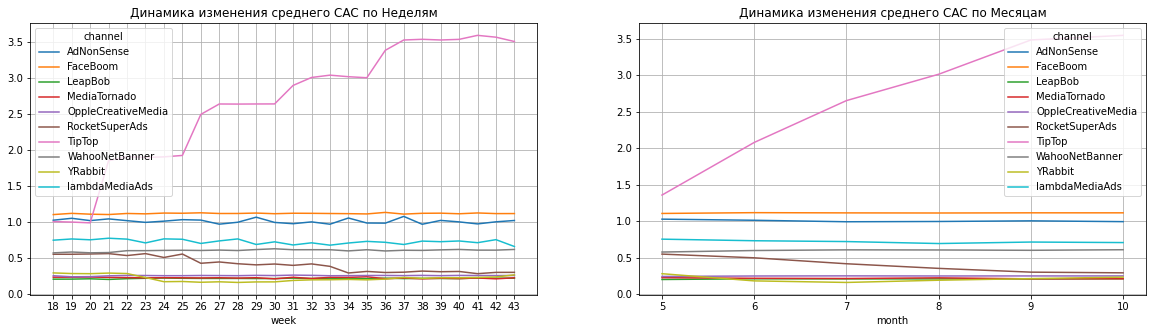

In [45]:
plt.figure(figsize=(20, 5)) # Задаем размер графиков

# Задаем недельные CAC
report_cac_week = (
    mean_cac_dynamic
    .reset_index()
    .pivot_table(index='channel', columns='week', values='acquisition_cost', aggfunc='mean')
)

# Строим динамику среднего CAC по Неделям
report_cac_week.T.plot(
    grid=True, xticks=list(report_cac_week.columns.values), ax=plt.subplot(1, 2, 1)
)
plt.title('Динамика изменения среднего CAC по Неделям')

# Задаем расходы по месяцам
report_cac_month = (
    mean_cac_dynamic
    .reset_index()
    .pivot_table(index='channel', columns='month', values='acquisition_cost', aggfunc='mean')
)

# Строим динамику среднего CAC по Месяцам
report_cac_month.T.plot(
    grid=True, xticks=list(report_cac_month.columns.values), ax=plt.subplot(1, 2, 2)
)
plt.title('Динамика изменения среднего CAC по Месяцам')
plt.show()

Самая дорогая стоимость привлечения одного пользователя у источника 'TipTop'. У источника 'TipTop' наблюдается сильный рост в стоимости среднего CAC, начиная с мая по октабрь. Увеличение стоимости началось с 20-й недели. Исключим из наблюдения данный источник, чтобы детальней изучить динамику остальных источников трафика

In [46]:
mean_cac_dynamic_without_tiptop = profiles.query('channel != "TipTop"')
mean_cac_dynamic_without_tiptop['week'] = (pd.to_datetime(mean_cac_dynamic_without_tiptop['dt'])
                                           .dt.isocalendar().week) # Получаем неделю
mean_cac_dynamic_without_tiptop['month'] = (pd.to_datetime(mean_cac_dynamic_without_tiptop['dt'])
                                            .dt.month) # Получаем месяц
mean_cac_dynamic_without_tiptop

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,week
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172,19
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237,28
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235,34
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769,40
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,6,True,1.008000,26
...,...,...,...,...,...,...,...,...,...,...
149992,999902143453,2019-09-17 20:28:14,OppleCreativeMedia,iPhone,UK,2019-09-17,9,False,0.261905,38
149993,999904695968,2019-05-19 01:29:17,FaceBoom,Mac,United States,2019-05-19,5,False,1.109483,20
149994,999911345560,2019-08-25 10:22:17,WahooNetBanner,Android,UK,2019-08-25,8,False,0.600000,34
150001,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,8,False,1.117838,33


Построим графики

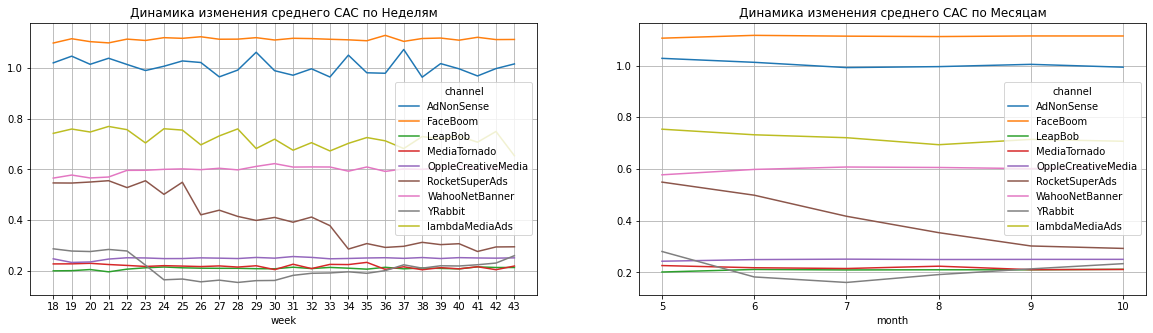

In [47]:
plt.figure(figsize=(20, 5)) # Задаем размер графиков

# Задаем недельные CAC
report_cac_week_without_tiptop = (
    mean_cac_dynamic_without_tiptop
    .reset_index()
    .pivot_table(index='channel', columns='week', values='acquisition_cost', aggfunc='mean')
)

# Строим динамику среднего CAC по Неделям
report_cac_week_without_tiptop.T.plot(
    grid=True, xticks=list(report_cac_week.columns.values), ax=plt.subplot(1, 2, 1)
)
plt.title('Динамика изменения среднего CAC по Неделям')

# Задаем расходы по месяцам
report_cac_month_without_tiptop = (
    mean_cac_dynamic_without_tiptop
    .reset_index()
    .pivot_table(index='channel', columns='month', values='acquisition_cost', aggfunc='mean')
)

# Строим динамику среднего CAC по Месяцам
report_cac_month_without_tiptop.T.plot(
    grid=True, xticks=list(report_cac_month.columns.values), ax=plt.subplot(1, 2, 2)
)
plt.title('Динамика изменения среднего CAC по Месяцам')
plt.show()

In [48]:
display('Максимальная цена:', mean_cac_dynamic_without_tiptop.query('channel == "RocketSuperAds"')['acquisition_cost'].max())
display('Минимальная цена:', mean_cac_dynamic_without_tiptop.query('channel == "RocketSuperAds"')['acquisition_cost'].min())

'Максимальная цена:'

0.6038709677419355

'Минимальная цена:'

0.20892857142857144

Хочется выделить источник 'RocketSuperAds', по которому бюджет не увеличивался, однако, средняя цена за привлеченного пользователя снизилась в 3 раза (с 0.60 до 0.20 y.e.)

**Выводы**
- Самая дорогая стоимость привлечения одного пользователя у источника 'TipTop',
- У источника 'TipTop' наблюдается сильный рост в стоимости среднего CAC, начиная с мая по октабрь. Увеличение стоимости началось с 20-й недели,
- У остальных источников средний CAC ниже более чем в 3 раза,
- Хочется выделить источник 'RocketSuperAds', по которому бюджет не увеличивался, однако, средняя цена за привлеченного пользователя снизилась в 3 раза (с 0.60 до 0.20 y.e.)
- Наиболее дорогостоящим каналом привлечения пользователей является TipTop, однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью.

**Общий вывод**
- У источника 'TipTop' наблюдается сильный рост в стоимости среднего CAC, начиная с мая по октабрь. Увеличение стоимости началось с 20-й недели. Начиная с 21-й недели началось увеличение расходов в источниках 'TipTop' и 'FaceBoom'. Пик расходов зафиксирован на 39-й неделе в Сентябре (9-й месяц). Самая дорогая стоимость привлечения одного пользователя у источника 'TipTop', однако, роста кол-ва пользователей и платящих пользователей не наблюдается,
- Из общего объема средств, более 51% приходится на источник 'TipTop', 38% - на 'FaceBoom',
- У остальных источников средний CAC ниже более чем в 3 раза,
- Рекламный канал 'RocketSuperAds' показывает положительную динамику по снижению средней цена за привлеченного пользователя: CAC снизилась в 3 раза (с 0.60 до 0.20 y.e.)
- В остальных источниках рекламный бюджет не увеличивается


### Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируим окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируим окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишем вывод, опишем возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Конверсия и динамика

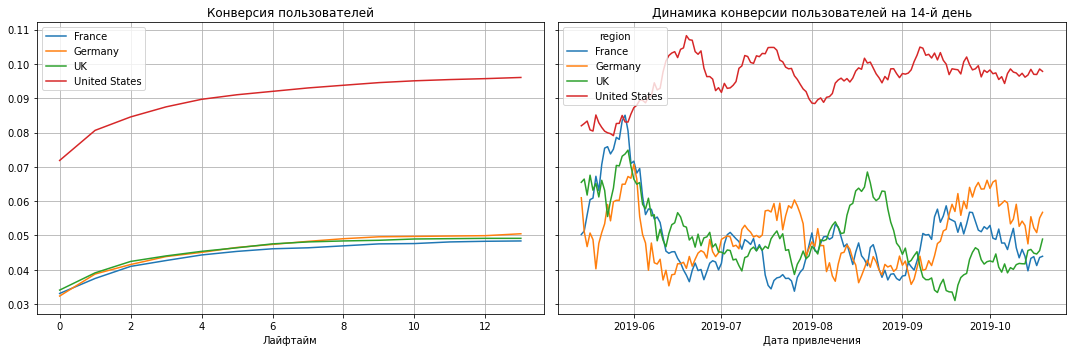

In [49]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Наибольшая конверсия у United States

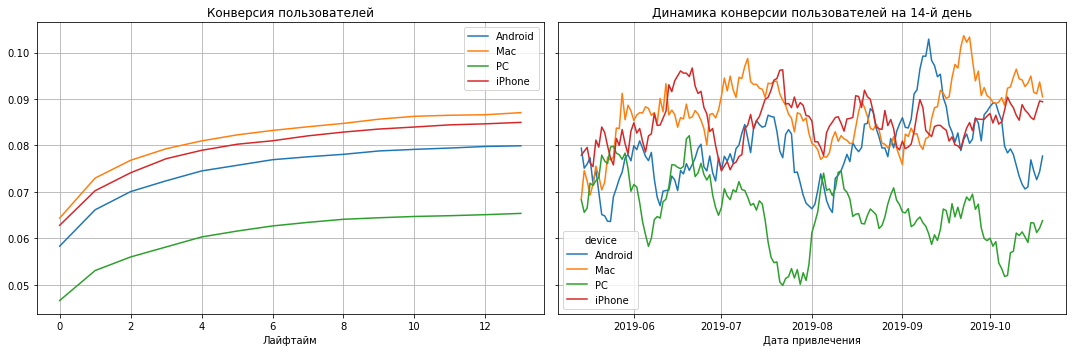

In [50]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Наибольшая конверсия у приходится на устройство 'Mac', за ним следует 'iPhone'

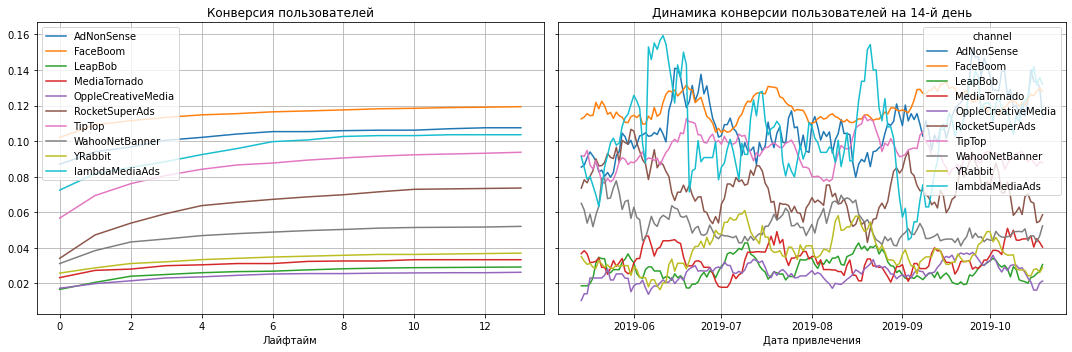

In [51]:
# смотрим конверсию с разбивкой по источникам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Среди каналов, лучшую конверсию имеет 'FaceBoom'. Он имеет более стабильную динамику по конверсиям, чем остальные источники

**Выводы**
- Наибольшая конверсия у United States
- Наибольшая конверсия у приходится на устройство 'Mac', за ним следует 'iPhone'
- Среди каналов, лучшую конверсию имеет 'FaceBoom'. Он имеет более стабильную динамику по конверсиям, чем остальные источники

#### Удержание и динамика

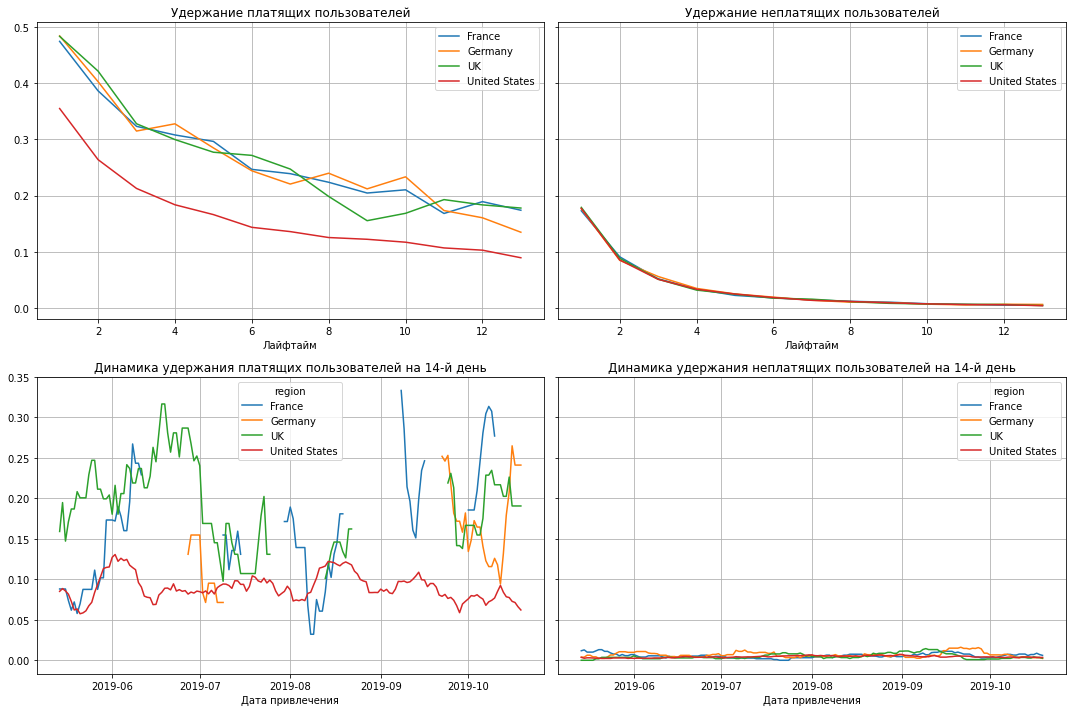

In [52]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Несмотря на то, что United States являются лидером по кол-ву платящих пользователей, удержание пользователей значительно ниже, чем в остальных странах. Стоит обратить внимание и поработать над повышением уровня удержания платящих юзеров. 

Во France с 2019-08 по 2019-10 есть проблемы с удержанием на 14-й день (судя по прерывистым линиям на графике динамики удержания пользователей на 14-й день).

В Germany стоит обратить внимание на Retention, поскольку много данных отсутсвуют.

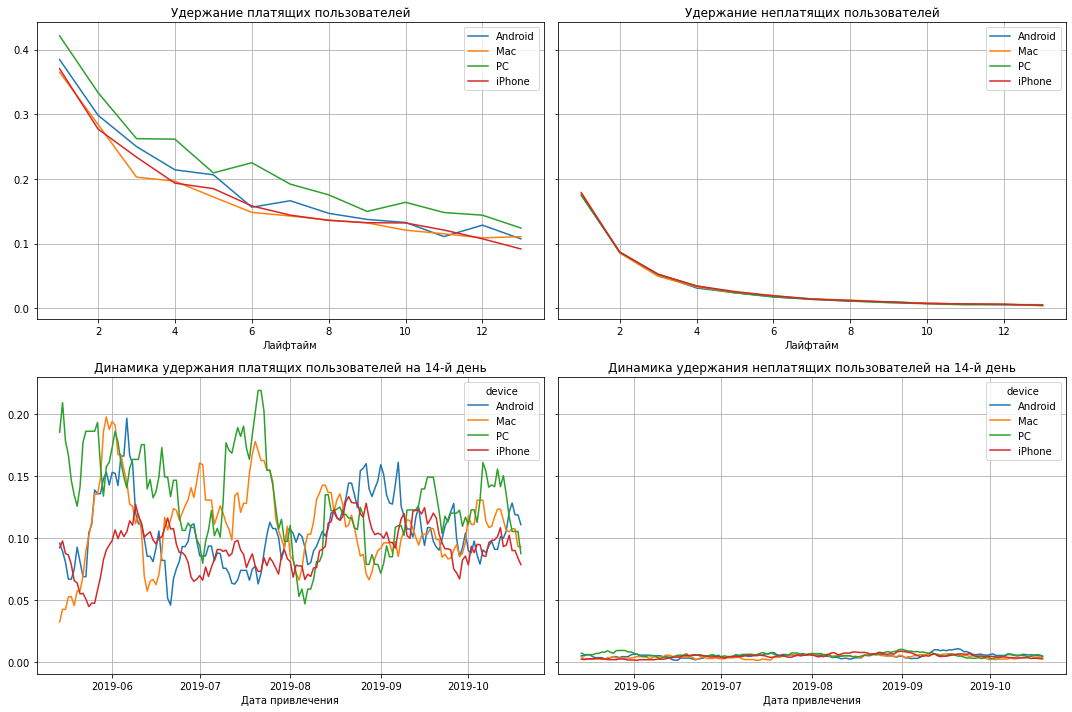

In [53]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

По удержанию платящих пользователей лучшие показатели у устройства 'PC'. У 'Mac' и 'iPhone' удержание гораздо ниже, чем у остальных устройств

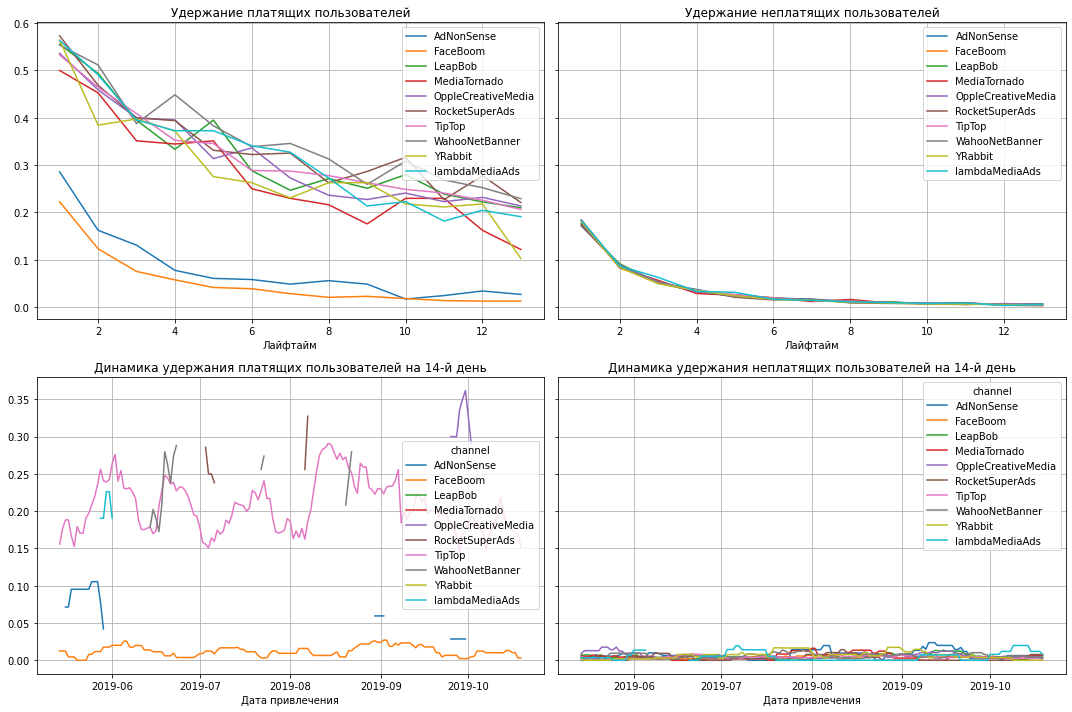

In [54]:
# смотрим удержание с разбивкой по источникам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

'FaceBoom' находится на втором месте по объему расходования средств на привлечение пользователей. Но у этого источника, вместе с 'AdNonSence' удержание платящих пользователей сильно ниже, чем у остальных источников трафика. Высокую динамику показывает лидер по объему расходования средств - источник 'TipTop'

**Выводы**
- Несмотря на то, что United States являются лидером по кол-ву платящих пользователей, удержание пользователей значительно ниже, чем в остальных странах. Стоит обратить внимание и поработать над повышением уровня удержания платящих юзеров.
- Во France с 2019-08 по 2019-10 есть проблемы с удержанием на 14-й день (судя по прерывистым линиям на графике динамики удержания пользователей на 14-й день).
- В Germany стоит обратить внимание на Retention, поскольку много данных отсутсвуют. Если данных нет - значит пользователи не доходят до 14-дня ретеншена,
- По удержанию платящих пользователей лучшие показатели у устройства 'PC'. У 'Mac' и 'iPhone' удержание гораздо ниже, чем у остальных устройств
- 'FaceBoom' находится на втором месте по объему расходования средств на привлечение пользователей. Но у этого источника, вместе с 'AdNonSence' удержание платящих пользователей сильно ниже, чем у остальных источников трафика. Высокую динамику удержания показывает лидер по объему расходования средств - источник 'TipTop'
- Следует отметить достаточно низкий уровень удержания неплатящих пользователей, который близок к нулю. Возможно, это может быть точкой роста, если рассмотреть новые варианты монетизации приложения, путем перевода неплатящих пользователей в платящие, например, модель Freemium (если она еще не используется продуктом)

#### Окупаемость рекламы общая

Сначала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

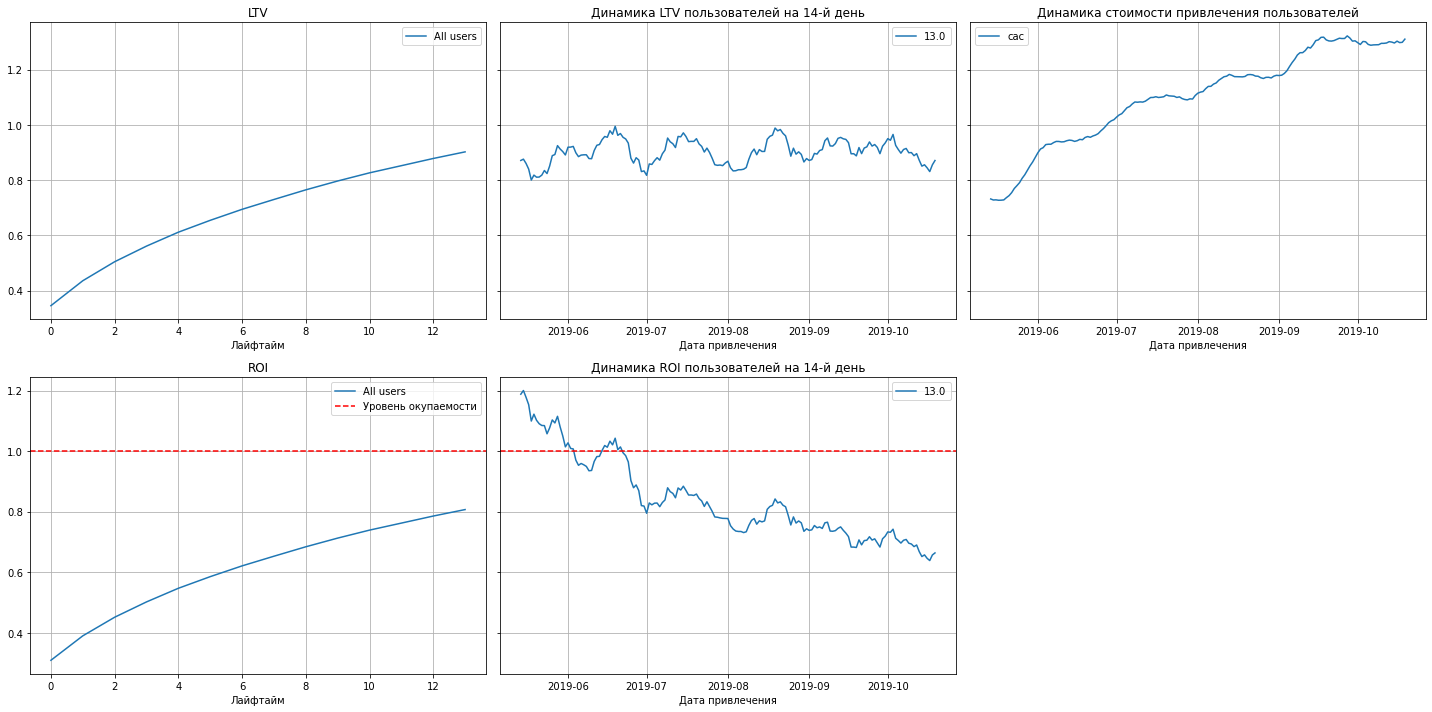

In [55]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Выводы**
- Реклама не окупается. ROI в конце второй недели — чуть выше 80%,
- CAC растет. На него могут оказывать влияние множество факторов. Первый - это рост рекламного бюджета по источникам 'TipTop' и 'FaceBoom'. Рост стоимости привлечения новых пользователей по источнику 'TipTop',
- Динамика ROI была положительной в интервале (включая, но не ограничиваясь) 2019-05 - 2019-06. Был еще один всплеск положительного ROI в середине 2019-06. Далее - ROI имел отрицательный рост,
- Показатель LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей,
- Наблюдаем, что динамика ROI за лайфтайм падает. При относительно стабильной динамике LTV, динамика САС растёт с мая по конец октября. Эту закономерность мы наблюдаем в динамике ROI, что при сильном увеличении САС, в равной степени падает динамика ROI пользователей.

Чтобы разобраться в причинах, проанализируем остальные характеристики пользователей — страна, источник и устройство первого посещения.

#### Окупаемость рекламы по странам

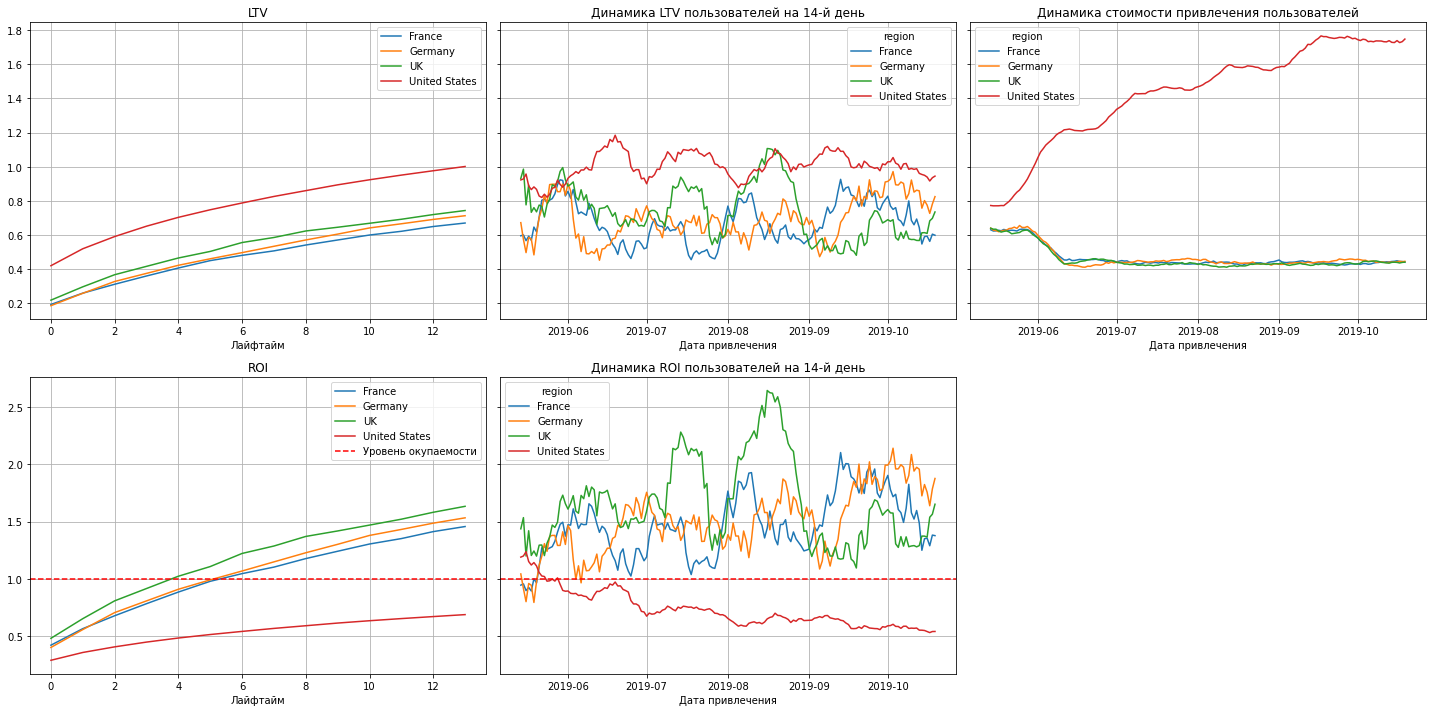

In [56]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Выводы**
- United States имеет наибольшее кол-во платящих пользователей. Но происходит сильный рост по стоимости привлечения пользователей в данном регионе. У остальных стран наблюдается снижение CAC,
- Несмотря на то, что United States имеет LTV выше других, это единственная страна, реклама в которой не окупается: ROI на 14-й день не доходит до порога окупаемости. При этом, в данной стране ухудшается динамика ROI,
- Нужно разбираться детальнее с рекламой в США, тем более, что это основной рынок приложения.

#### Окупаемость рекламы по источникам

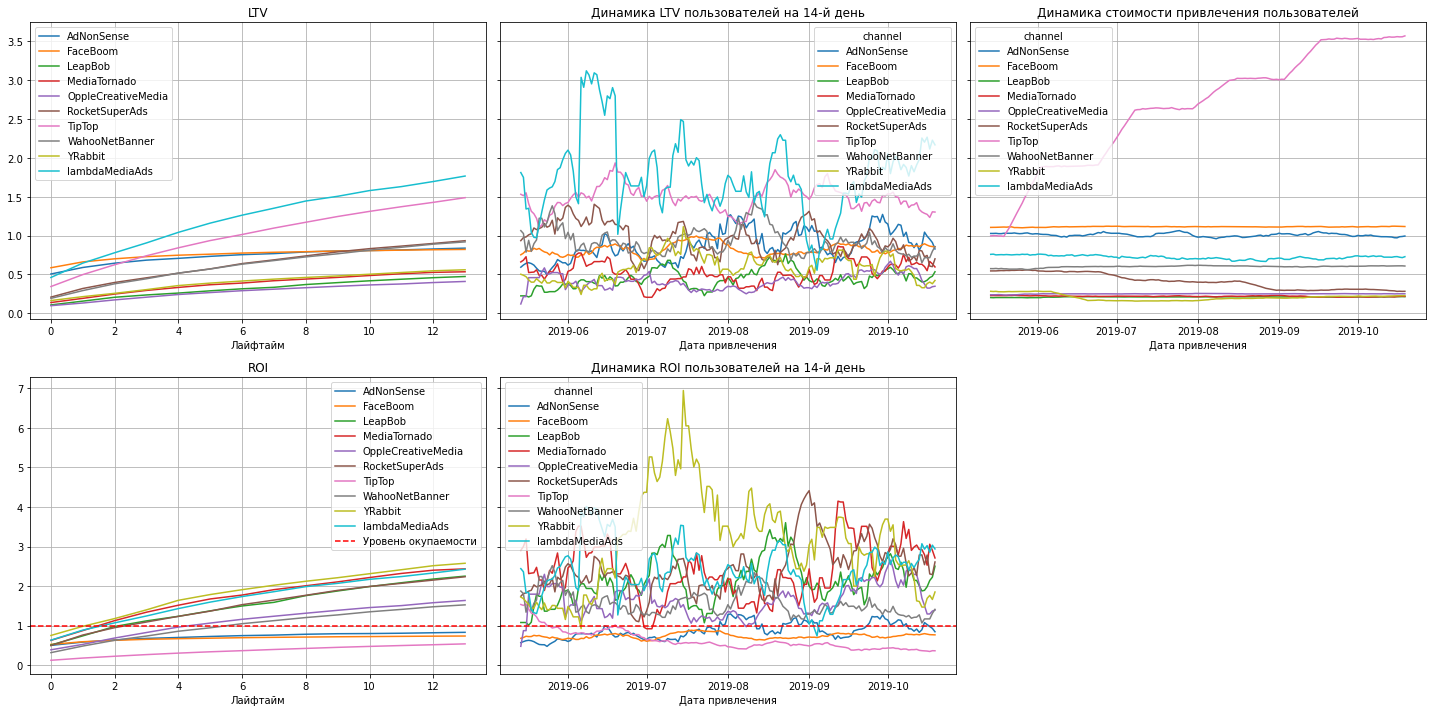

In [57]:
# смотрим окупаемость с разбивкой по источникам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Выводы**
- Лучший LTV и динамику LTV демонстрирует источник 'lambdaMediaAds',
- Стоимость привлечения пользователей с источника 'TipTop' имеет сильную тенденцию к росту. Следует поработать с данным источником для снижения CAC,
- Источники 'TipTop', 'FaceBoom' и 'AdNonSense' не окупаются,
- Есть проблемы с каналом TipTop, видим значительный рост затрат на привлечение.

#### Окупаемость рекламы по устройствам

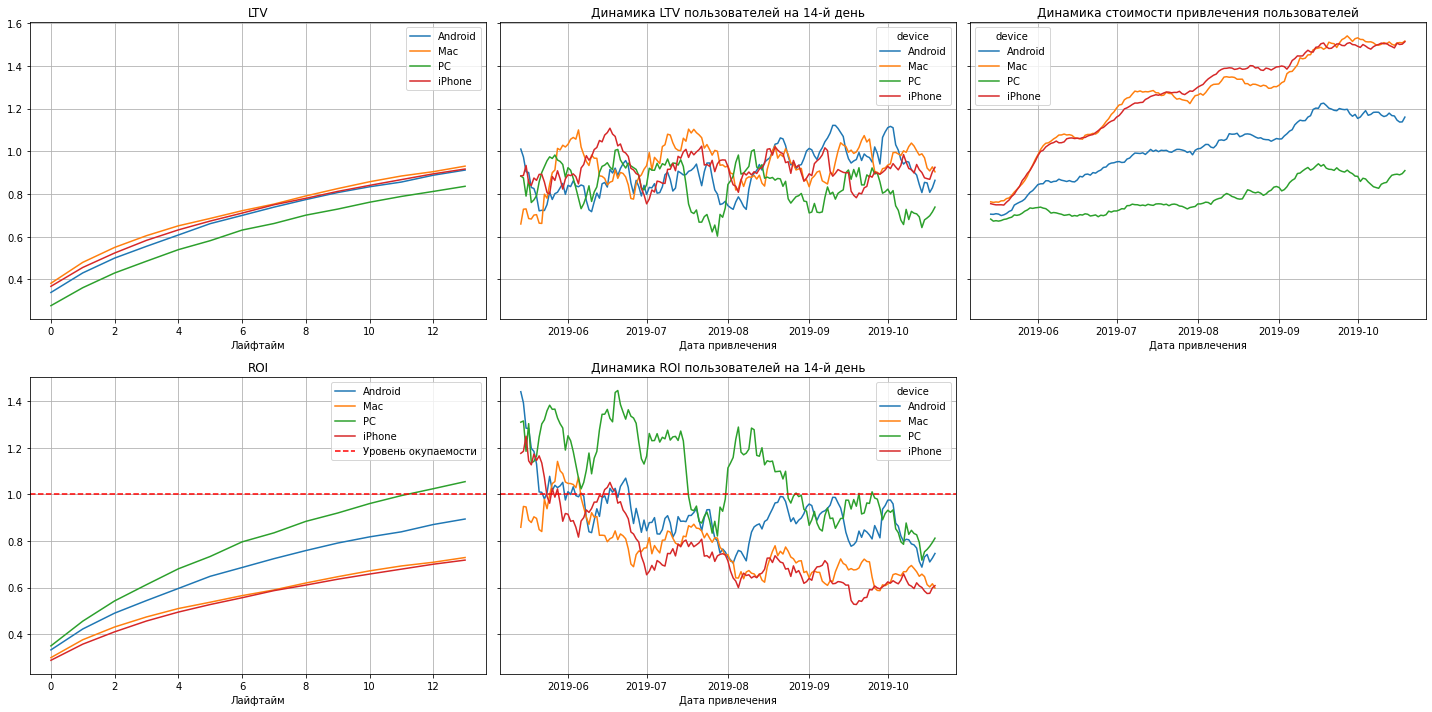

In [58]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Выводы**
- По всем девайсам растет стоимость привлечения пользователей, хоть и имеет LTV ниже, чем у остальных устройств,
- В среднем, на 13-й день окупается реклама по устройствам 'PC'. Остальные устройства не окупаются в рассматриваемый период,
- С окупаемостью проблемы по всем устройствам кроме PC. Это значит, что у нас, по крайней мере, нет технических проблем, влияющих на монетизацию.

Проанализируем, какой из каналов приносит наибольшую прибыль в отдельной стране. 

In [59]:
# Группируем по user_id значения из 'orders'
orders_market = (orders.sort_values(by=['user_id', 'event_dt'])
                .groupby('user_id')
                .agg({'event_dt':'first',
                      'revenue':'sum'
                     
                     })
                )

# Группируем по 'user_id' полученные значения из 'orders_market_grouped'
orders_market_grouped = orders_market.pivot_table(index='user_id', values='revenue', aggfunc='sum')

# Получим уникальные user_id по дате совершения покупки из датасета 'visits'
visits_market = (visits.sort_values(by=['user_id', 'session_start'])
                .groupby('user_id')
                .agg({'session_start':'first',
                      'channel':'first',
                      'device':'first',
                      'region':'first'
                     
                     })
                )

# Просоединим датасет 'visits_market' к 'orders_market_grouped' по 'user_id'
market = orders_market_grouped.merge(visits_market, on='user_id', how='left').reset_index()

# Получим уникальные значения по странам
market_list = list(market['region'].unique())

Построим график доли прибыли в разрезе источников трафика в конкретной стране

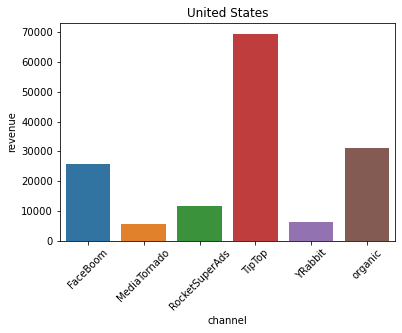

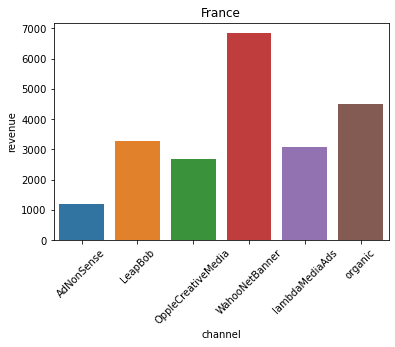

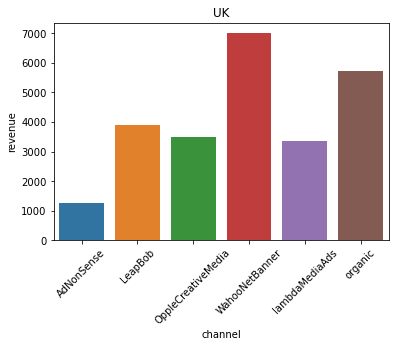

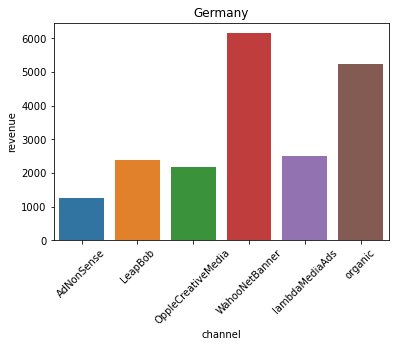

In [60]:
for value in market_list:
    n = 1 # Задаем номер графика
    
    market_country = (market.query('region == @value')
                      .pivot_table(index='channel', values='revenue', aggfunc='sum')
                      .reset_index())
    # Строим диаграмму для визуализации
    fig, ax_n = plt.subplots(1,2) # Размер графика
    ax_n = plt.subplot(1, 1, n)
    ax_n.set_title(value)
    plt.xticks(rotation=45)  # Угол наклона подписей
    ax_n = sns.barplot(data=market_country, x='channel', y='revenue');

    # Добавляем подписи к графику
    #for i in ax_n.containers:
    #    ax_n.bar_label(i,)
    #return profiles_connect
    n += 1

**Вывод**
- В наиболее важном для приложения рынке United States, лидирует по 'revenue' канал 'TipTop',

Посчитаем, сколько рекламного бюджета расходуется в какой стране

In [61]:
profiles_countries = profiles.pivot_table(index='region', values='acquisition_cost', aggfunc='sum').reset_index()
profiles_countries

,region,acquisition_cost
0,France,5075.973946
1,Germany,4424.223235
2,UK,5068.502819
3,United States,90928.600000


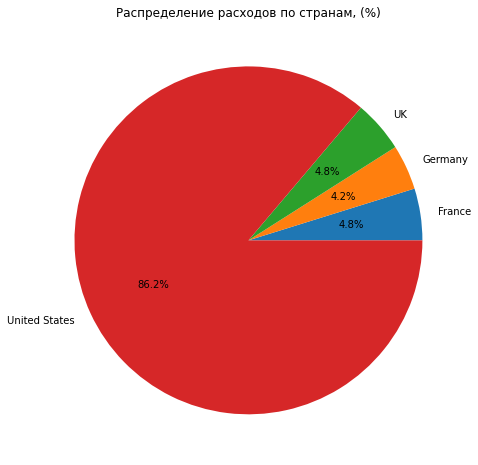

In [62]:
# Строим круговую диаграмму для визуализации
fig, ax = plt.subplots(figsize=(8, 8)) # Размер графика
labels = profiles_countries['region']
ax.set_title('Распределение расходов по странам, (%)')
ax.pie(data=profiles_countries, x='acquisition_cost', labels=labels,autopct='%1.1f%%');
plt.show()

**Вывод**
- 86% раходов рекламного бюджета приходится на United States, при этом она не окупается

Посмотрим, есть ли источник в United States, в котором инвестиии в рекламу окупаются. Для этого сформируем отдельный профиль и переделаем функцию get_ltv() под новый профиль

In [63]:
profiles_usa = profiles.query('region == "United States"')
profiles_usa

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,week
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172,19
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237,28
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769,40
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,5,False,1.128205,19
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,5,False,0.250435,19
...,...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,5,False,1.900000,21
150001,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,8,False,1.117838,33
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,9,False,3.500000,39
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,7,False,2.600000,30


In [64]:
# функция для расчёта LTV и ROI для United States

def get_ltv_usa(
    profiles_usa,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles_usa.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

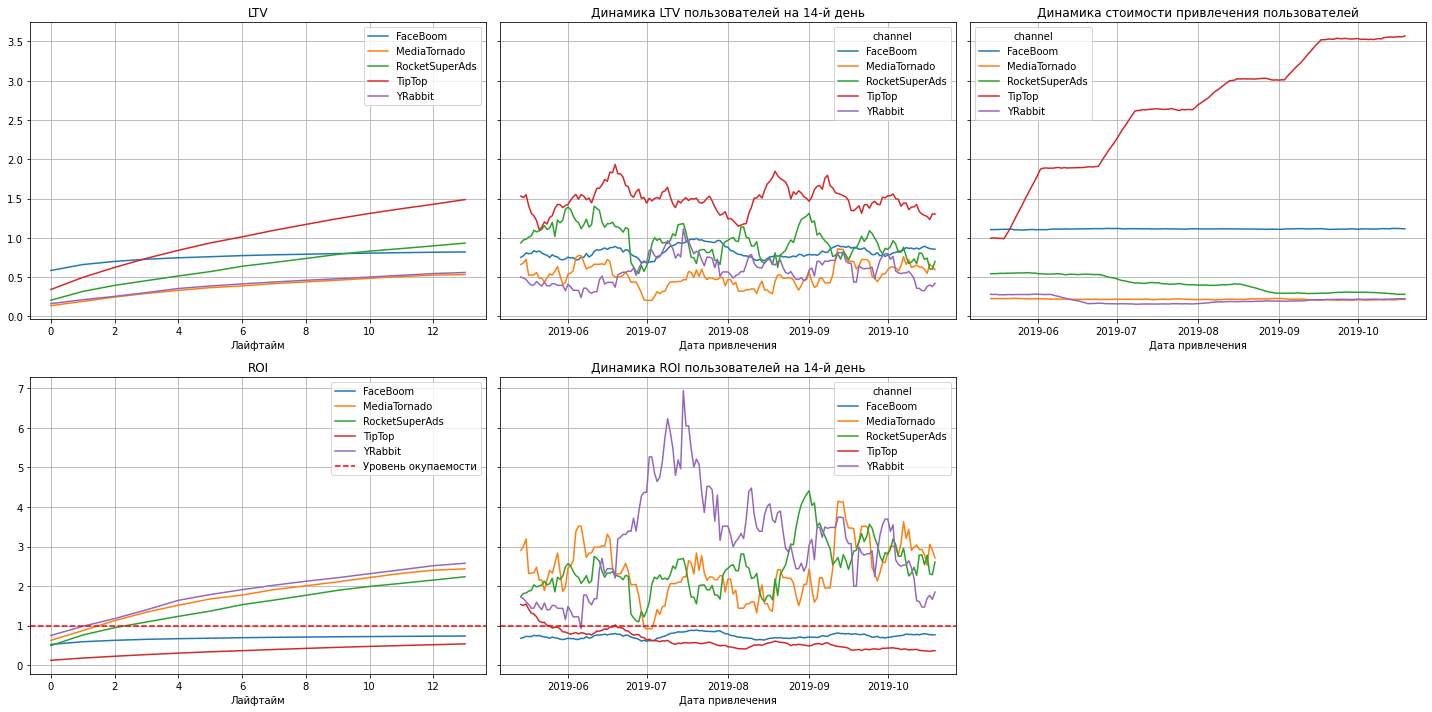

In [65]:
# смотрим окупаемость с разбивкой по источникам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_usa(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Выводы**
- В регионе United States есть источники трафика, которые окупаются: 'MediaTornado', 'RocketSuperAds', 'YRabbit'. Имеет смысл рассмотреть возможность перераспределения рекламного бюджета на данные источники
- Регион United States - основной рынок для приложения. Следует пересмотреть подходы к работе с рекламными источниками 'TipTop' и 'FaceBoom', 
- 86% раходов рекламного бюджета приходится на United States, при этом регион не окупается,
- В данном гео лидирует по 'revenue' канал 'TipTop', который забирает на себя большую часть бюджета и не окупается,
- Однако, в данном регионе есть источники трафика, вложения в рекламу которых окупаются: 'MediaTornado', 'RocketSuperAds', 'YRabbit'. 

**Общий вывод**
- Несмотря на то, что United States являются лидером по кол-ву платящих пользователей и имеет высокую конверсию, удержание пользователей значительно ниже, чем в остальных странах. Стоит обратить внимание и поработать над повышением уровня удержания платящих юзеров. United States имеет наибольшее кол-во платящих пользователей. Но происходит сильный рост по стоимости привлечения пользователей в данном регионе. У остальных стран наблюдается снижение CAC.

- По удержанию платящих пользователей лучшие показатели у устройства 'PC'. У 'Mac' и 'iPhone' удержание гораздо ниже, чем у остальных устройств
- 'FaceBoom' находится на втором месте по объему расходования средств на привлечение пользователей. Но у этого источника, вместе с 'AdNonSence' удержание платящих пользователей сильно ниже, чем у остальных источников трафика. Высокую динамику удержания показывает лидер по объему расходования средств - источник 'TipTop'
- Следует отметить достаточно низкий уровень удержания неплатящих пользователей, который близок к нулю. Возможно, это может быть точкой роста, если рассмотреть новые варианты монетизации приложения, путем перевода неплатящих пользователей в платящие, например, модель Freemium (если она еще не используется продуктом)
- Реклама не окупается. ROI в конце второй недели — чуть выше 80%,
- Динамика ROI была положительной в интервале (включая, но не ограничиваясь) 2019-05 - 2019-06. Был еще один всплеск положительного ROI в середине 2019-06. Далее - ROI имел отрицательный рост,
- Показатель LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
- Источники 'TipTop', 'FaceBoom' и 'AdNonSense' не окупаются.
- По всем девайсам растет стоимость привлечения пользователей, хоть и имеет LTV ниже, чем у остальных устройств,
- В среднем, на 13-й день окупается реклама по устройствам 'PC'. Остальные устройства не окупаются в рассматриваемый период

### Выводы


#### Промежуточные выводы

**Гео:**
- Пользователи продукта заходят в приложение из четырех стран: United States, UK, France и Germany. Больше всего трафика приходится на United States. 
- Больше всего платящих пользователей из United States, их доля составляет 6,9%
- Наибольшая доля платящих пользователей от общего числа пользователей принадлежит устройству 'Mac' (6,4%). Среди устройств платящих пользователей от общего числа устройств платящих пользователей, первое место занимает 'iPhone'

**Маркетинг:**
- Сумма расходов на маркетинг: 105497 у.е.
- Из общего объема средств, более 51% приходится на источник 'TipTop', 38% - на 'FaceBoom'
- Начиная с 21-й недели началось увеличение расходов в источниках 'TipTop' и 'FaceBoom'. Пик расходов зафиксирован на 39-й неделе в Сентябре (9-й месяц). В остальных источниках увеличения рекламного бюджета не наблюдается

**Конверсия и динамика:**
- Самая дорогая стоимость привлечения одного пользователя у источника 'TipTop',
- У источника 'TipTop' наблюдается сильный рост в стоимости среднего CAC, начиная с мая по октабрь. Увеличение стоимости началось с 20-й недели,
- У остальных источников средний CAC ниже более чем в 3 раза,
- Источник 'RocketSuperAds' показывает положительную динамику по снижению средней цена за привлеченного пользователя: CAC снизилась в 3 раза (с 0.60 до 0.20 y.e.).

**Удержание и динамика:**
- Несмотря на то, что United States являются лидером по кол-ву платящих пользователей, удержание пользователей значительно ниже, чем в остальных странах. Стоит обратить внимание и поработать над повышением уровня удержания платящих юзеров.
- Во France с 2019-08 по 2019-10 есть проблемы с удержанием на 14-й день (судя по прерывистым линиям на графике динамики удержания пользователей на 14-й день),
- В Germany стоит обратить внимание на Retention, поскольку много данных отсутсвуют. Если данных нет - значит пользователи не доходят до 14-дня ретеншена,
- По удержанию платящих пользователей лучшие показатели у устройства 'PC'. У 'Mac' и 'iPhone' удержание гораздо ниже, чем у остальных устройств
- 'FaceBoom' находится на втором месте по объему расходования средств на привлечение пользователей. Но у этого источника, вместе с 'AdNonSence' удержание платящих пользователей сильно ниже, чем у остальных источников трафика. Высокую динамику удержания показывает лидер по объему расходования средств - источник 'TipTop'
- Следует отметить достаточно низкий уровень удержания неплатящих пользователей, который близок к нулю. Возможно, это может быть точкой роста, если рассмотреть новые варианты монетизации приложения, путем перевода неплатящих пользователей в платящие, например, модель Freemium (если она еще не используется продуктом)

**Окупаемость рекламы:**
- Реклама не окупается. ROI в конце второй недели — чуть выше 80%,
- CAC растет. На него могут оказывать влияние множество факторов. Первый - это рост рекламного бюджета по источникам 'TipTop' и 'FaceBoom'. Рост стоимости привлечения новых пользователей по источнику 'TipTop',
- Динамика ROI была положительной в интервале (включая, но не ограничиваясь) 2019-05 - 2019-06. Был еще один всплеск положительного ROI в середине 2019-06. Далее - ROI имел отрицательный рост,
- Показатель LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей,
- Средний CAC по проекту составляет 0,70 у.е.

**Окупаемость рекламы по странам:**
- United States имеет наибольшее кол-во платящих пользователей. Но происходит сильный рост по стоимости привлечения пользователей в данном регионе. У остальных стран наблюдается снижение CAC. 
- Несмотря на то, что United States имеет LTV выше других, это единственная страна, реклама в которой не окупается: ROI на 14-й день не доходит до порога окупаемости. При этом, в данной стране ухудшается динамика ROI

**Окупаемость рекламы по источникам:**
- Лучший LTV и динамику LTV демонстрирует источник 'lambdaMediaAds',
- Стоимость привлечения пользователей с источника 'TipTop' имеет сильную тенденцию к росту. Следует поработать с данным источником для снижения CAC,
- Источники 'TipTop', 'FaceBoom' и 'AdNonSense' не окупаются.

**Окупаемость по устройствам:**
- По всем девайсам растет стоимость привлечения пользователей, хоть и имеет LTV ниже, чем у остальных устройств,
- В среднем, на 13-й день окупается реклама по устройствам 'PC'. Остальные устройства не окупаются в рассматриваемый период

#### Итоговые выводы

- Больше всего приходит пользователей из United States и они лучше других конвертируется. При этом большая часть пользователей заходит с мобильных устройств,
- Наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей. Возможно, тут есть плюсы ApplePay,
- Рекламный бюджет не окупается,
- Негативное влияние на рекламу оказывает источник 'TipTop': на данный источник приходится более 51% рекламного бюджета, и его доля постоянно растет. При этом, по данной площадке происходит рост стоимости привлечения пользователей. Инвестиции в рекламу не окупаются,
- Следует обратить внимание на источник 'FaceBoom': ого доля в общем рекламном бюджете составляет 38%. Несмотря на стабильную CAC, источник не окупается.
- Можно перераспределить бюджет на источники, которые окупают рекламу: 'YRabbit', 'MediaTornado', 'lambdaMediaAds', 'LeapBob', 'OppleCreativeMedia', 'RocketSuperAds',
- Реклама в United States не окупается и имеет нисходящий тренд по окупаемости и удержание пользователей значительно ниже, чем в остальных странах. Стоит рассмотреть возможность перераспределения бюджета на другие страны.

#### Рекомендации

- Регион United States - основной рынок для приложения. Следует пересмотреть подходы к работе с рекламными источниками 'TipTop' и 'FaceBoom', возможно их получится оптимизировать и улучшить качество привлекаемых пользователейРегион United States - основной рынок для приложения. Следует пересмотреть подходы к работе с рекламными источниками 'TipTop' и 'FaceBoom',
- Провести продуктовую аналитику для увеличения уровня возврата клиентов,
- Рассмотреть возможность перераспределения рекламного бюджета с неэффективных источников на 'MediaTornado', 'RocketSuperAds', 'YRabbit'.